In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.integrate import cumtrapz

In [2]:
# Array of sample positions used (as strings)
# in order of when they went in the ICC
# i.e. I put a sample in position 1 first and 6 last
SAMPLES = ['1', '3', '6']

# Specify how many minutes elapsed between
# the start time of each sample
MINS_BETWEEN_SAMPLES = 7

# Calculates seconds between the
# start time of each sample
SECS_BETWEEN_SAMPLES = MINS_BETWEEN_SAMPLES * 60

# Time when you actually start
# measuring data
# Note: 2700 seconds is 45 mins
START_TIME_IN_SECS = 2700

In [3]:
# Import data file and skip first 25 rows of garbage
df = pd.read_csv('icc_sample_data.csv', skiprows=25)

# Did you accidentally put one of your samples in the reference water holder?
# If so, this line flips that signal from negative to positive heat flow
# i.e. comment this line out if you did not mess up your samples!
df['Normalized heat flow [Signal, 533:6]'] = df['Normalized heat flow [Signal, 533:6]']*-1

# Drop unused columns because they get
# in the way of 'melting' the data
df = df.drop([
        'Temperature [Temperature]',
        'Time markers',
    ],
    axis=1
)

# Drop unused columns because they get
# in the way of 'melting' the data
for s in SAMPLES:
    df = df.drop([
            'Heat flow [Signal, 533:' + s + ']',
            'Heat [Signal, 533:' + s + ']',
            'Normalized heat [Signal, 533:' + s + ']',
        ],
        axis = 1
    )

# Rename the remaining columns for readability
for s in SAMPLES:
    df = df.rename(columns={
        'Normalized heat flow [Signal, 533:' + s + ']': 'Sample ' + s,
    })

# Melt dataframe for ease of plotting
# Melt function reshapes dataframe from wide to long format
# https://pandas.pydata.org/pandas-docs/version/1.0.0/reference/api/pandas.DataFrame.melt.html
df = df.melt(['Time'], var_name='Sample', value_name='Normalized heat flow')

# Offset timestamps for each sample
for x,s in enumerate(SAMPLES[::-1]):
    df.loc[df['Sample'] == 'Sample ' + s, 'Time'] -= (START_TIME_IN_SECS + x*SECS_BETWEEN_SAMPLES)

# Throw away rows before experiment start time
df = df[df['Time'] >= 50]

df['Time (hours)'] = df['Time']/3600

# Throw away rows where 'Normalized heat flow' is Nan
df = df.dropna(subset=['Normalized heat flow'])

# Calculate integral of 'Normalized heat flow'
# and add as 'Normalized heat' column
for s in SAMPLES:
    sample = df.loc[df['Sample'] == 'Sample ' + s]

    df.loc[df['Sample'] == 'Sample ' + s, 'Normalized heat'] = cumtrapz(
        sample['Normalized heat flow'],
        sample['Time'],
        initial=0
    )

(0.0, 18.0)

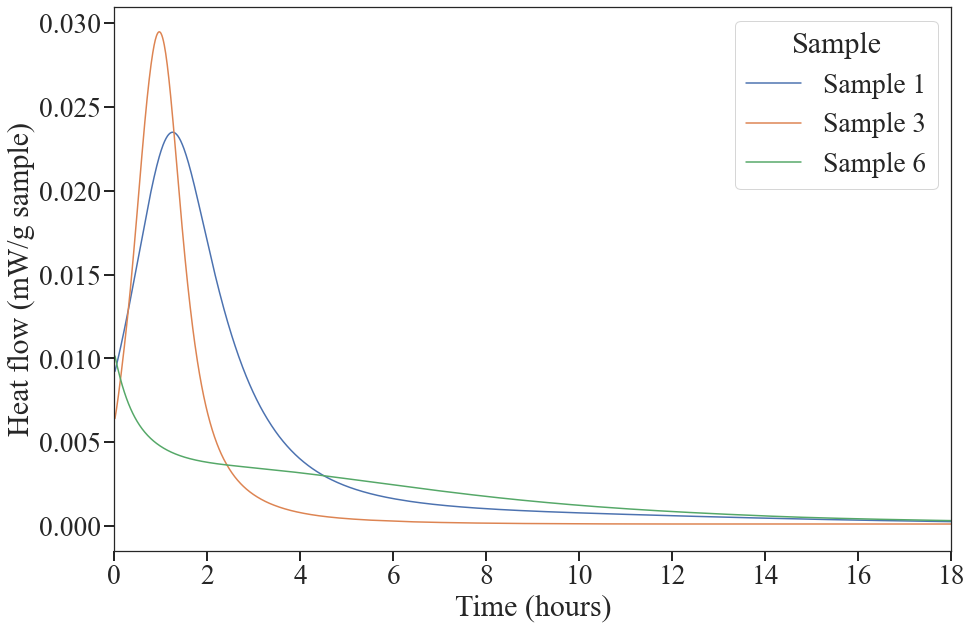

In [4]:
sns.set(font_scale = 2.5)
sns.set_style("white")
plt.rcParams["font.family"] = "Times New Roman"
f, ax = plt.subplots(figsize=(15, 10))
ax.tick_params(bottom=True, left=True, width=2, length=10)
plot = sns.lineplot(
    data=df,
    x="Time (hours)",
    y="Normalized heat flow",
    hue="Sample"
)

plot.set_xlabel('Time (hours)')
plot.set_ylabel('Heat flow (mW/g sample)')

# Your data probably goes past 18 hours
# but the peaks in this sample dataset are early
ax.set_xlim(0, 18)

# ------ Some optional graph settings that I frequently use -----

# Move lengend the the right side of the plot
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Save figure as svg to current directory
# I use Adobe Illustrator to add additional annotations
# plt.savefig('filename.svg')

(0.0, 18.0)

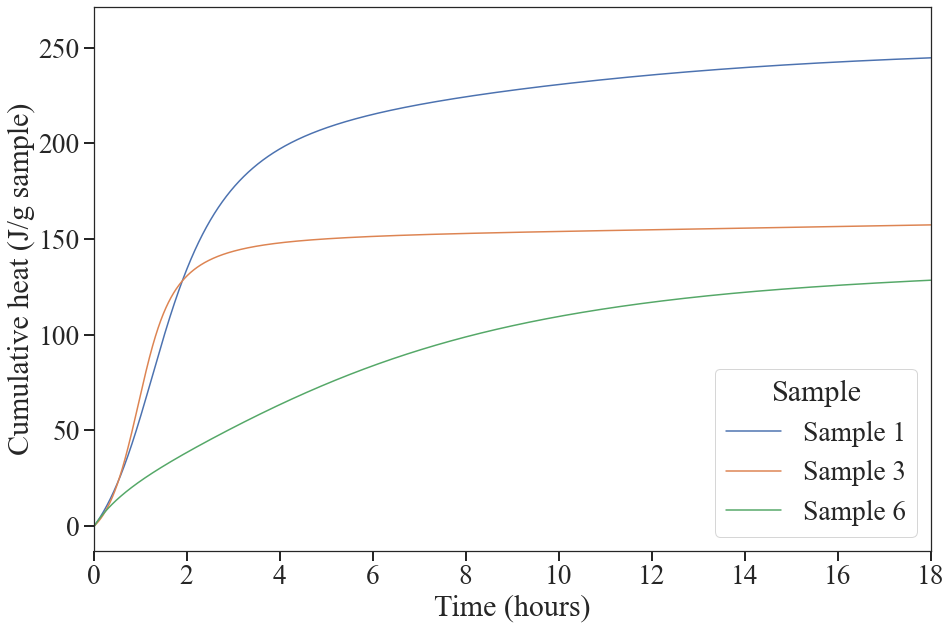

In [5]:
sns.set(font_scale = 2.5)
sns.set_style("white")
plt.rcParams["font.family"] = "Times New Roman"
f, ax = plt.subplots(figsize=(15, 10))
ax.tick_params(bottom=True, left=True, width=2, length=10)

plot = sns.lineplot(
    data=df,
    x="Time (hours)",
    y="Normalized heat",
    hue="Sample"
)

plot.set_xlabel('Time (hours)')
plot.set_ylabel('Cumulative heat (J/g sample)')

# Your data probably goes past 18 hours
# but the peaks in this sample dataset are early
ax.set_xlim(0, 18)

# ------ Some optional graph settings that I frequently use -----

# Move lengend the the right side of the plot
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Save figure as svg to current directory
# I use Adobe Illustrator to add additional annotations
# plt.savefig('filename.svg')